# Prior estimation

In [1]:
include("src/main.jl")
OPTCONFIG=OptConfig(XTOLABS=1e-8, DEBUG=true);

INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Distributions.ji for module Distributions.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/numerik/bzfsikor/.julia/lib/v0.6/Seaborn.ji for module Seaborn.


In [59]:
# enable pyplot-latex
PyCall.PyDict(PyPlot.matplotlib["rcParams"])["text.usetex"] = false

false

## The Model

In [19]:
# exponential
xlims = (0,4)
n = 100 # was 500
ndata = 100
σ = 0.3
prior = Truncated(MixtureModel([Normal(mu, .5) for mu in [1, 3]]), xlims...)


t    = Transformation(x->exp(x), x->log(x))

Transformation(#116, #117)

In [20]:
randseed=90
srand(randseed)
m = FEModel(f=x->x, xs=linspace(xlims...,n), σ=σ)
d = generatedata(m, prior, ndata);
mt   = transformmodel(m, t)

FEModel(ft, 1.0:0.5413954548802448:54.598150033144236, 0.3)

In [63]:
ncv = 10
kfold = 5;

In [52]:
lims = ([0,4],[0,.6],[1,55], [0,.2])

([0, 4], [0.0, 0.6], [1, 55], [0.0, 0.2])

## Results

In [53]:
figsize=(4,3)

(4, 3)

In [70]:
cvparms = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3] #
regs = [ReferenceRegularizer(m, γ) for γ in cvparms]
plot()

regR = []
ndatas = [20, 25, 30, 40, 50, 50, 100, 100, 200, 200, 300, 300, 500, 500, 1000, 2000, 5000, 10000, 20000, 50000]
for M in ndatas 
  let d = generatedata(m, prior, M)
    @time ss = [cvscore(m, d, d->ebprior(m, d, r), kfold) for r in regs]
    #plot([r.γ for r in regs], ss)
    @show M
    @show gamma = regs[indmax(ss)].γ
    push!(regR, gamma)
  end
end
regR

 61.245570 seconds (12.05 M allocations: 49.593 GiB, 19.03% gc time)
M = 20
gamma = regs[indmax(ss)].γ = 0.3


 39.298826 seconds (8.95 M allocations: 33.288 GiB, 19.41% gc time)
M = 25
gamma = regs[indmax(ss)].γ = 0.3


 34.175893 seconds (8.48 M allocations: 29.816 GiB, 18.76% gc time)
M = 30
gamma = regs[indmax(ss)].γ = 0.3


 42.943798 seconds (10.56 M allocations: 37.268 GiB, 19.31% gc time)
M = 40
gamma = regs[indmax(ss)].γ = 0.0005


 41.636339 seconds (10.91 M allocations: 36.416 GiB, 18.96% gc time)
M = 50
gamma = regs[indmax(ss)].γ = 0.3


 47.648272 seconds (11.80 M allocations: 40.929 GiB, 19.25% gc time)
M = 50
gamma = regs[indmax(ss)].γ = 0.3


 52.257304 seconds (15.24 M allocations: 45.381 GiB, 18.06% gc time)
M = 100
gamma = regs[indmax(ss)].γ = 0.0001


 56.353001 seconds (15.85 M allocations: 48.840 GiB, 18.30% gc time)
M = 100
gamma = regs[indmax(ss)].γ = 0.01


 60.751466 seconds (22.38 M allocations: 55.499 GiB, 18.01% gc time)
M = 200
gamma = regs[indmax(ss)].γ = 0.05


 69.358837 seconds (23.49 M allocations: 63.258 GiB, 17.83% gc time)
M = 200
gamma = regs[indmax(ss)].γ = 0.2


 57.495917 seconds (27.97 M allocations: 52.700 GiB, 17.38% gc time)
M = 300
gamma = regs[indmax(ss)].γ = 0.1


 66.861590 seconds (29.07 M allocations: 61.739 GiB, 17.53% gc time)
M = 300
gamma = regs[indmax(ss)].γ = 0.3


127.264860 seconds (47.43 M allocations: 124.518 GiB, 16.93% gc time)
M = 500
gamma = regs[indmax(ss)].γ = 0.05


 80.506238 seconds (43.05 M allocations: 76.855 GiB, 16.94% gc time)
M = 500
gamma = regs[indmax(ss)].γ = 0.01


169.600037 seconds (82.08 M allocations: 175.729 GiB, 16.53% gc time)
M = 1000
gamma = regs[indmax(ss)].γ = 0.05


360.637764 seconds (156.57 M allocations: 383.701 GiB, 15.56% gc time)
M = 2000
gamma = regs[indmax(ss)].γ = 0.01


1056.892645 seconds (373.25 M allocations: 877.481 GiB, 10.95% gc time)
M = 5000
gamma = regs[indmax(ss)].γ = 0.01


1804.742478 seconds (730.06 M allocations: 1.262 TiB, 9.38% gc time)
M = 10000
gamma = regs[indmax(ss)].γ = 0.0001


4540.925523 seconds (1.45 G allocations: 3.695 TiB, 7.01% gc time)
M = 20000
gamma = regs[indmax(ss)].γ = 0.005


in callback catch


LoadError: [91mInterruptException:[39m

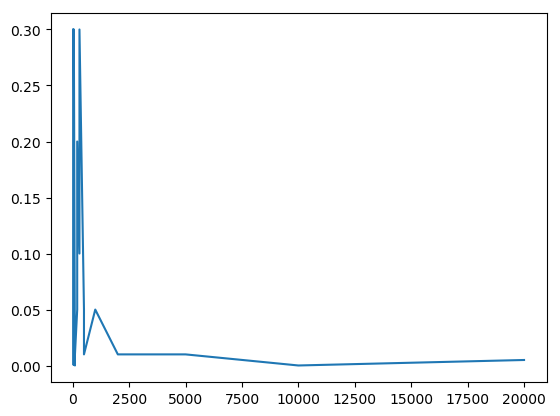

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7775eae690>

In [71]:
plot(ndatas[1:length(regR)], regR)

In [72]:
regR

19-element Array{Any,1}:
 0.3   
 0.3   
 0.3   
 0.0005
 0.3   
 0.3   
 0.0001
 0.01  
 0.05  
 0.2   
 0.1   
 0.3   
 0.05  
 0.01  
 0.05  
 0.01  
 0.01  
 0.0001
 0.005 

In [ ]:

dkl(w1, w2) = sum(w1 * log(w1/w2))